<a href="https://colab.research.google.com/github/ewattudo/datamanagement/blob/main/ps4_revised.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PS4

# Setup, Import, Manipulation and Merge

In [ ]:
#Using code from previous projects and Dr. Adam
import time, os, sys, re #basics
import zipfile, json, datetime, string
import numpy as np #basic math
from statistics import * #stats

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import matplotlib.patches as mpatches

import pandas as pd
import pandas_datareader as pdr
from pandas_datareader import wb
from pandas.io.formats.style import Styler
import requests

import missingno as msno

from google.colab import files

import seaborn as sns

from google.colab import data_table
data_table.enable_dataframe_formatter()
data_table.max_columns = 50

import pandas as pd
import urllib.request
import numpy as np

import plotly.express as px
import plotly.graph_objects as go

!pip install geopandas==1.0.1
!pip install mapclassify
import geopandas as gpd

import time, webbrowser, zipfile

from google.colab import data_table
data_table.enable_dataframe_formatter()

import plotly.express as px
import plotly.graph_objects as go

!pip install ydata-profiling
from ydata_profiling import ProfileReport

from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import silhouette_visualizer

!pip install adjustText
from adjustText import adjust_text

!pip install tabula-py
import tabula

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.7/395.7 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.2/43.2 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 60.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=1bf8baea156888b814cdc9b889f344071b1821240972ef04438e6ed78fac9e56
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 62.8 MB/s eta 0:00:00


## US Map (SHP) Import

**Source: US Census:**
https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip

**Project for the future:** I really want a US map with Hawaii and Alaska inset. I tried to find one quite unsuccessfully.

In [ ]:
! wget -q -O US.zip https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip

zip_ref = zipfile.ZipFile('US.zip', 'r'); zip_ref.extractall(); zip_ref.close()

In [ ]:
US=gpd.read_file('/content/cb_2018_us_state_500k.shp')

## US Map (SHP) Manipulation

Having used this data before, I know that I am goning to have to rename some fields for merging and get rid of some of the states.

In [ ]:
#I am going to have to rename NAME
US.dtypes

,0
STATEFP,object
STATENS,object
AFFGEOID,object
GEOID,object
STUSPS,object
NAME,object
LSAD,object
ALAND,int64
AWATER,int64
geometry,geometry


In [ ]:
#I want to rename NAME colume to State
US.rename(columns={'NAME':'State'}, inplace=True)

In [ ]:
#I only want to look at states, not territories.
#I removed HI and AK, but if I do this for further study. I can't remove them, but the map looks off when I include them.
US = US[~US['State'].isin(['Alaska','District of Columbia','Hawaii','Puerto Rico','American Samoa','United States Virgin Islands','Guam','Commonwealth of the Northern Mariana Islands'])]

# Creating *Chocolate Cities* Map

### Using Mapping to Create the AllSouth FIeld

In [ ]:
#Revised Chocolate Cities-style region mapping
chocolate_cities_mapping = {
    # OUT SOUTH
    "Montana": "OUT SOUTH", "Wyoming": "OUT SOUTH", "Idaho": "OUT SOUTH",
    "Washington": "OUT SOUTH", "Oregon": "OUT SOUTH",

    # WEST SOUTH
    "Colorado": "WEST SOUTH", "New Mexico": "WEST SOUTH", "Arizona": "WEST SOUTH", "Utah": "WEST SOUTH",
    "California": "WEST SOUTH", "Nevada": "WEST SOUTH", "Texas": "WEST SOUTH",

    # MID SOUTH
    "Missouri": "MID SOUTH", "Kansas": "MID SOUTH", "Illinois": "MID SOUTH",
    "Indiana": "MID SOUTH", "Iowa": "MID SOUTH", "Nebraska": "MID SOUTH",
    "Michigan": "MID SOUTH", "Oklahoma": "MID SOUTH", "South Dakota": "MID SOUTH",
    "Ohio": "MID SOUTH", "Wisconsin": "MID SOUTH", "Minnesota": "MID SOUTH",
    "North Dakota": "MID SOUTH", "Kentucky": "MID SOUTH", "West Virginia": "MID SOUTH",

    # UP SOUTH
    "New York": "UP SOUTH", "Massachusetts": "UP SOUTH", "Connecticut": "UP SOUTH",
    "Rhode Island": "UP SOUTH", "New Jersey": "UP SOUTH", "Vermont": "UP SOUTH",
    "New Hampshire": "UP SOUTH", "Maine": "UP SOUTH", "Pennsylvania": "UP SOUTH",
    "Maryland": "UP SOUTH", "Delaware": "UP SOUTH",

    # DOWN SOUTH
    "Virginia": "DOWN SOUTH", "North Carolina": "DOWN SOUTH", "South Carolina": "DOWN SOUTH",
    "Florida": "DOWN SOUTH", "Georgia": "DOWN SOUTH",

    # DEEP SOUTH
    "Alabama": "DEEP SOUTH", "Mississippi": "DEEP SOUTH",
    "Louisiana": "DEEP SOUTH", "Tennessee": "DEEP SOUTH", "Arkansas": "DEEP SOUTH"
}

# Apply the updated mapping to your GeoDataFrame
US["AllSouth"] = US["State"].map(chocolate_cities_mapping)

In [ ]:
#Checking to see if I missed any states
US[US["AllSouth"].isnull()]["State"]

,State


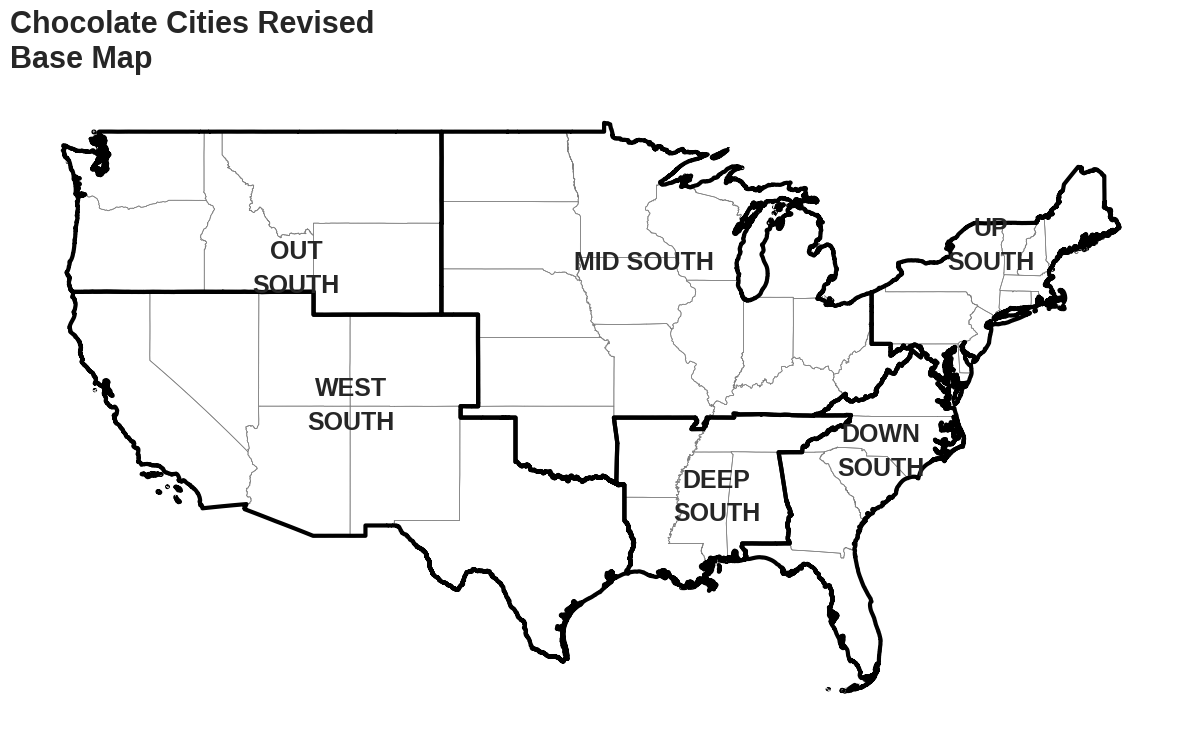

In [ ]:
# Create regional geometries from the AllSouth column
regions = US.dissolve(by='AllSouth')

# Plot setup
fig, ax = plt.subplots(1, figsize=(15, 50))

# Plot state boundaries in grey
US.boundary.plot(ax=ax, edgecolor='grey', linewidth=0.5)

# Plot bold region borders
regions.boundary.plot(ax=ax, edgecolor='black', linewidth=3)

# Clean up axes
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])

# Two-line, left-aligned title
ax.set_title("Chocolate Cities Revised\nBase Map", loc='left', fontsize=22, fontweight='bold', pad=20)

# Updated region label positions with formatting
region_labels = {
    "OUT SOUTH": (-112, 42),
    "WEST SOUTH": (-109, 36),
    "MID SOUTH": (-93, 43),
    "UP SOUTH": (-74, 43),
    "DOWN SOUTH": (-80, 34),
    "DEEP SOUTH": (-89, 32),
}

# Optional: Label line breaks for multi-line regions
label_text = {
    "OUT SOUTH": "OUT\nSOUTH",
    "WEST SOUTH": "WEST\nSOUTH",
    "MID SOUTH": "MID SOUTH",  # Left as one line for Iowa anchor
    "UP SOUTH": "UP\nSOUTH",
    "DOWN SOUTH": "DOWN\nSOUTH",
    "DEEP SOUTH": "DEEP\nSOUTH"
}

# Add region names to the map
for label, (x, y) in region_labels.items():
    ax.text(x, y, label_text[label], fontsize=18, fontweight='bold', ha='center', linespacing=1.5)

plt.show()